# Lab 2 - Python Code

Group 3: Dube, V., Garay, E. Guerrero, J., Villalba, M.

## Multicollinearity

Multicolinearity occurs when two or more predictors in a regresion model are highly correlated to one another, causing a higher variance our the estimated coefficients. To understand the way multicollinearity affects our regresion we can examine the composition of the variance of our estimates. 

Suppose some Data Generating Process follows:

\begin{equation*}
  Y = X_1\beta_1 +\epsilon
\end{equation*}

Considering the partitioned regression model:

\begin{align*}
  Y &= X\beta + e \\
  Y &= X_1\beta_1 + X_2\beta_2 + e
\end{align*}

We know that the OLS estimator will solve this equation:

\begin{align*}
(X'X)\hat{\beta} &=X'Y \\

\begin{bmatrix}
  X_1'X_1      & X_1'X_2   \\
  X_2'X_1      & X_2'X_2 
\end{bmatrix}
\begin{bmatrix}
\hat{\beta_1} \\
\hat{\beta_2}
\end{bmatrix}
& =
\begin{bmatrix}
X_1'Y \\
X_2'Y
\end{bmatrix}
\end{align*}

This, because of the Frisch-Whaugh-Lovell Theorem, yields:

\begin{align*}
  \hat{\beta_1} &= (X_1'M_2X_1)^{-1}X_1'M_2Y
\end{align*}

Where $M_2 = I - X_2(X_2'X_2)^{-1}X_2'$, is the orthogonal projection matrix to $X_2$.

Note that $M_2$ is symmetric, idempotent, and that any variable premultiplied by it yields the residual from from running $X_2$ on that variable. For an arbitrary variable $Z$:

\begin{align*}
  M_2Z &= (I - X_2(X_2'X_2)^{-1}X_2')Z \\
  &= Z - X_2(X_2'X_2)^{-1}X_2'Z \\
  &= Z - X_2\hat{\omega} \\
  &= Z - \hat{Z} \\
  &= e_{Z}
\end{align*}

Where $e_{Z}$ and $\hat{\omega} \equiv (X_2'X_2)^{-1}X_2'Z$ come from the regresion: $$ Z = X_2\hat{\omega} + e_{Z}$$

In a sense, the $M_2$ matrix cleanses or "filters out" our $Z$ variable, keeping only the part which is orthogonal to $X_2$.

Returning to $\hat{\beta_1}$:

\begin{align*}
  \hat{\beta_1} &= (X_1'M_2X_1)^{-1}X_1'M_2Y \\
  &= (X_1'M_2X_1)^{-1}X_1'M_2(X_1\beta_1 + \epsilon) \\
  &= \beta_1 + (X_1'M_2X_1)^{-1}X_1'M_2\epsilon 
\end{align*}

For the conditional variance of $\hat{\beta_1}$ this has great implications:

\begin{align*}
  Var(\hat{\beta_1}|X) &= Var(\beta_1 + (X_1'M_2X_1)^{-1}X_1'M_2\epsilon|X) \\
  &= Var((X_1'M_2X_1)^{-1}X_1'M_2\epsilon|X) \\
  &= E[((X_1'M_2X_1)^{-1}X_1'M_2\epsilon)((X_1'M_2X_1)^{-1}X_1'M_2\epsilon)'|X] \\
  &= E[(X_1'M_2X_1)^{-1}X_1'M_2\epsilon\epsilon'M_2'X_1(X_1'M_2'X_1)^{-1}|X] \\
  &= (X_1'M_2X_1)^{-1}X_1'M_2E[\epsilon\epsilon'|X]M_2'X_1(X_1'M_2'X_1)^{-1}
\end{align*}

Under the traditional assumption that $E[\epsilon\epsilon'|X] = \sigma^2I$:

\begin{align*}
 Var(\hat{\beta_1}|X) &= \sigma^2(X_1'M_2X_1)^{-1}X_1'M_2M_2'X_1(X_1'M_2'X_1)^{-1} \\
&= \sigma^2(X_1'M_2'X_1)^{-1}
\end{align*}

Remembering that the variance of $X_1$ can be decomposed into two positive components:

\begin{align*}
  X_1 &= X_2\alpha + v \\
  Var(X_1) &= Var(X_2\alpha) + Var(v) \\
  Var(X_1) - Var(X_2\alpha) &= Var(v) \\
  E[X_1'X_1] - Var(X_2\alpha) &= E[X_1'M_2'X_1]
\end{align*}

Thus, necessarily: $$E[X_1'M_2X_1] \leq E[X_1'X_1]$$ 

Altogether this means: $$\sigma^2(X_1'X_1)^{-1} \leq \sigma^2(X_1'M_2'X_1)^{-1}$$

This shows that controlling for the irrelevant variables $X_2$ will in fact increase the variance of $\hat{\beta_1}$ by limiting us to the "usable" variance of $X_1$ which is orthogonal to $X_2$. 

Suppose we want to estimate the impact of years of schooling on future salary. Imagine as well that we have a vast array of possible control variables at our disposal. Someone who is not familiar with the concept of multicollinearity might think that to avoid any possibility of ommited variable bias and ensure consistency it is best to control for everything we can. We now know this is not the case and that this approach can inadvertently introduce multicollinearity. 

Consider that we have as a possible control variable the total number of courses taken by each student. Intuitively, years of schooling are likely to correlate strongly with the number of total courses taken (more years in school tipically leads to more courses completed) and so controlling for this variable may result in the problem described above, inflating the variance of the estimated coefficients and potentially distorting our understanding of the true effect of schooling on salary. 

The same rationale applies to many other examples. For instance, imagine estimating the impact of marketing expenditure on sales. Controlling for variable such as number of marketing campaigns will probably cause the same issue.


### Perfectly collinear regressors

A special case of the previously mentioned concept of multicollinearity arises when a variable is a linear combination of some other variables from our dataset, so not only are these variables highly correlated, but we say that they are perfectly collinear.

Considering the partitioned regression model:

\begin{align*}
    Y &= x_1\beta_1 + X_2\beta_2 + \epsilon \\
    x_1 &= X_2 \alpha
\end{align*}

where the second equation is deterministic.

We know that the OLS estimator will solve this equation:

\begin{align*}
(X'X)\hat{\beta} &=X'Y \\

\begin{bmatrix}
  X_1'X_1      & X_1'X_2   \\
  X_2'X_1      & X_2'X_2 
\end{bmatrix}
\begin{bmatrix}
\hat{\beta_1} \\
\hat{\beta_2}
\end{bmatrix}
& =
\begin{bmatrix}
X_1'Y \\
X_2'Y
\end{bmatrix}
\end{align*}

Substituting $X_1 = X_2 \alpha$ on the $(X'X)$ matrix:

\begin{align*}
(X'X) &=
\begin{bmatrix}
  (X_2\alpha)'X_2\alpha      & (X_2\alpha)'X_2   \\
  X_2'(X_2\alpha)      & X_2'X_2 
\end{bmatrix} \\

&=
\begin{bmatrix}
  \alpha'X_2'X_2\alpha      & \alpha'X_2'X_2   \\
  X_2'X_2\alpha      & X_2'X_2 
\end{bmatrix}
\end{align*}

This yields the determinant:

\begin{align*}
\det (X'X) &= \det\left(
\begin{bmatrix}
  \alpha'X_2'X_2\alpha      & \alpha'X_2'X_2   \\
  X_2'X_2\alpha      & X_2'X_2 
\end{bmatrix} \right) \\
\end{align*}

Transforming the matrix using row operations:
\begin{align*}
\det (X'X) &= \det\left(
\begin{bmatrix}
  I      & -\alpha'   \\
  0      & I 
\end{bmatrix}
\begin{bmatrix}
  \alpha'X_2'X_2\alpha      & \alpha'X_2'X_2   \\
  X_2'X_2\alpha      & X_2'X_2 
\end{bmatrix} \right) \\
&= \det\left(
\begin{bmatrix}
  0      & 0   \\
  X_2'X_2\alpha      & X_2'X_2 
\end{bmatrix} \right)
\end{align*}

Like this, we can see that:
\begin{align*}
\det (X'X) &= 0
\end{align*}

Because of this, $(X'X)$ is not invertible and there is no solution for the OLS estimation



### Practical application

We can easily show what we have theoretically explained with a practical application. We will create a dataset simulating the regressors that we may want to include in the estimation of a linear model.

The first 9 variables follow a normal distribution.

In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import inv, LinAlgError

# Seed for reproducibility
np.random.seed(0)

# Generate 9 vectors of normal distributions
X = np.random.randn(10, 9)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8
0,1.764052,0.400157,0.978738,2.240893,1.867558,-0.977278,0.950088,-0.151357,-0.103219
1,0.410599,0.144044,1.454274,0.761038,0.121675,0.443863,0.333674,1.494079,-0.205158
2,0.313068,-0.854096,-2.552990,0.653619,0.864436,-0.742165,2.269755,-1.454366,0.045759
3,-0.187184,1.532779,1.469359,0.154947,0.378163,-0.887786,-1.980796,-0.347912,0.156349
4,1.230291,1.202380,-0.387327,-0.302303,-1.048553,-1.420018,-1.706270,1.950775,-0.509652
5,-0.438074,-1.252795,0.777490,-1.613898,-0.212740,-0.895467,0.386902,-0.510805,-1.180632
6,-0.028182,0.428332,0.066517,0.302472,-0.634322,-0.362741,-0.672460,-0.359553,-0.813146
7,-1.726283,0.177426,-0.401781,-1.630198,0.462782,-0.907298,0.051945,0.729091,0.128983
8,1.139401,-1.234826,0.402342,-0.684810,-0.870797,-0.578850,-0.311553,0.056165,-1.165150
9,0.900826,0.465662,-1.536244,1.488252,1.895889,1.178780,-0.179925,-1.070753,1.054452


However, the 10th variable is a linear combination (the sum) of variables 1, 5 and 9.

In [2]:
# Create the 10th vector as a linear combination of vectors 1, 5, and 9
a, b, c = 1, 1, 1
X = np.hstack([X, (a*X[:, 0] + b*X[:, 4] + c*X[:, 8]).reshape(10,1)])
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,1.764052,0.400157,0.978738,2.240893,1.867558,-0.977278,0.950088,-0.151357,-0.103219,3.528391
1,0.410599,0.144044,1.454274,0.761038,0.121675,0.443863,0.333674,1.494079,-0.205158,0.327115
2,0.313068,-0.854096,-2.552990,0.653619,0.864436,-0.742165,2.269755,-1.454366,0.045759,1.223262
3,-0.187184,1.532779,1.469359,0.154947,0.378163,-0.887786,-1.980796,-0.347912,0.156349,0.347328
4,1.230291,1.202380,-0.387327,-0.302303,-1.048553,-1.420018,-1.706270,1.950775,-0.509652,-0.327914
5,-0.438074,-1.252795,0.777490,-1.613898,-0.212740,-0.895467,0.386902,-0.510805,-1.180632,-1.831447
6,-0.028182,0.428332,0.066517,0.302472,-0.634322,-0.362741,-0.672460,-0.359553,-0.813146,-1.475651
7,-1.726283,0.177426,-0.401781,-1.630198,0.462782,-0.907298,0.051945,0.729091,0.128983,-1.134517
8,1.139401,-1.234826,0.402342,-0.684810,-0.870797,-0.578850,-0.311553,0.056165,-1.165150,-0.896546
9,0.900826,0.465662,-1.536244,1.488252,1.895889,1.178780,-0.179925,-1.070753,1.054452,3.851167


As we saw in theory, this should cause our dataset to have a determinant of zero. Thus, making X singular and yielding an error message when trying to invert it.

In [3]:
np.linalg.det(X)

1.0098307832528084e-13

In [4]:
pd.DataFrame(inv(X))

,0,1,2,3,4,5,6,7,8,9
0,-1.199889e+15,1.801440e+15,1.392735e+15,1.415658e+15,9.653012e+13,3.252962e+14,-5.392287e+14,-4.107423e+14,2.334001e+14,2.658898e+14
1,9.568882e-01,-1.607297e+00,-1.452389e+00,-1.581686e+00,1.002832e+00,1.810799e+00,2.414320e-01,-9.804048e-01,-2.591498e+00,8.121699e-03
2,2.729573e-01,-3.174262e-01,-3.248933e-01,-1.024257e-01,-4.607751e-02,1.494138e-01,-1.582449e-01,-2.141899e-01,-2.589349e-01,-2.381031e-01
3,-1.314975e+00,1.663818e+00,1.316748e+00,1.302163e+00,-7.972630e-01,-1.528744e+00,3.777566e-02,5.674403e-01,1.639215e+00,-3.485951e-02
4,-1.199889e+15,1.801440e+15,1.392735e+15,1.415658e+15,9.653012e+13,3.252962e+14,-5.392287e+14,-4.107423e+14,2.334001e+14,2.658898e+14
5,2.802669e-01,-5.811803e-01,-8.573224e-01,-9.797333e-01,2.685130e-01,7.978812e-01,2.750149e-01,-4.043804e-01,-9.763545e-01,2.882150e-01
6,7.085413e-01,-1.040756e+00,-7.763937e-01,-1.195168e+00,4.913696e-01,1.007714e+00,-5.571324e-02,-6.134050e-01,-1.578493e+00,-2.636936e-01
7,-4.802377e-01,1.078846e+00,5.833448e-01,5.360183e-01,-6.271024e-02,-4.305357e-01,-1.356475e-01,3.729121e-01,6.578932e-01,1.184780e-01
8,-1.199889e+15,1.801440e+15,1.392735e+15,1.415658e+15,9.653012e+13,3.252962e+14,-5.392287e+14,-4.107423e+14,2.334001e+14,2.658898e+14
9,1.199889e+15,-1.801440e+15,-1.392735e+15,-1.415658e+15,-9.653012e+13,-3.252962e+14,5.392287e+14,4.107423e+14,-2.334001e+14,-2.658898e+14


We can see that this is not the case. Is this a contradiction to our theoretical proof? Python, as well as Julia, yield a determinant extremely close to cero but not equal to cero, so they are able to find a "supposed" inverse to the matrix. This would seem to contradict what we have proven in theory, however, this is a problem rooted in the way those languages handle float values. Thus, that is not a contradiction of theory but rather an illustration of how computational environments deal differently with the inherent limitations of floating-point arithmetic.

## Analyzing RCT data with precision adjustment

In [5]:
pip install pandas matplotlib seaborn statsmodels scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

Penn = pd.read_csv("C:/Users/Erzo/Documents/GitHub/CausalAI-Course/data/penn_jae.dat" , sep='\s', engine='python')
#Penn = pd.read_csv("../../../data/penn_jae.dat" , sep='\s', engine='python')
# Filtering to focus on Treatment Group 2 and Control Group
Penn_filtered = Penn[(Penn['tg'] == 2) | (Penn['tg'] == 0)]
# Actualiza los valores de 'tg' a 1 donde 'tg' es igual a 2
Penn_filtered.update(Penn_filtered[Penn_filtered['tg'] == 2][['tg']].replace(to_replace=2, value=1))

# Plotting histograms for the outcome variable 'inuidur1'
plt.figure(figsize=(12, 6))
sns.histplot(Penn_filtered[Penn_filtered['tg'] == 1]['inuidur1'], color='blue', label='Treatment Group 2', kde=True)
sns.histplot(Penn_filtered[Penn_filtered['tg'] == 0]['inuidur1'], color='red', label='Control Group', kde=True)
plt.title('Distribution of inuidur1 for Treatment Group 2 and Control Group')
plt.xlabel('inuidur1')
plt.ylabel('Frequency')
plt.legend()
plt.show()


<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Matias Villalba\AppData\Local\Temp\ipykernel_25988\2367704136.py:7: SyntaxWarning: invalid escape sequence '\s'
  Penn = pd.read_csv("C:/Users/Erzo/Documents/GitHub/CausalAI-Course/data/penn_jae.dat" , sep='\s', engine='python')


C:\Users\Matias Villalba\AppData\Local\Temp\ipykernel_25988\2367704136.py:7: SyntaxWarning: invalid escape sequence '\s'
  Penn = pd.read_csv("C:/Users/Erzo/Documents/GitHub/CausalAI-Course/data/penn_jae.dat" , sep='\s', engine='python')


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Erzo/Documents/GitHub/CausalAI-Course/data/penn_jae.dat'

In [4]:
#1 Classical 2-Sample Approach (CL)
import statsmodels.api as sm

# Filtering treatment and control groups
treatment = Penn_filtered[Penn_filtered['tg'] == 1]['inuidur1']
control = Penn_filtered[Penn_filtered['tg'] == 0]['inuidur1']

# Calculate the mean difference using Independent T-test
t2_sample = sm.stats.ttest_ind(treatment, control)
print(f"Classical 2-Sample Approach t-statistic: {t2_sample[0]}, p-value: {t2_sample[1]}")

Classical 2-Sample Approach t-statistic: -2.5833616019006493, p-value: 0.009808603470207428


In [6]:
#2 Classical Linear Regression Adjustment (CRA)

cra_model = sm.OLS.from_formula('inuidur1 ~ tg+ (female+black+othrace+C(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)**2', data=Penn_filtered)
cra_results = cra_model.fit()
print(cra_results.summary())

                            OLS Regression Results                            
Dep. Variable:               inuidur1   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     3.139
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           4.49e-25
Time:                        00:07:59   Log-Likelihood:                -21649.
No. Observations:                5782   AIC:                         4.352e+04
Df Residuals:                    5671   BIC:                         4.426e+04
Df Model:                         110                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              10.3939    

In [12]:
#3 Interactive Regression Adjustment (IRA)
ira_model = sm.OLS.from_formula('inuidur1 ~ tg +tg*((female+black+othrace+C(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)**2)+(female+black+othrace+C(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)**2', data=Penn_filtered)
ira_results = ira_model.fit()
print(ira_results.summary())

                            OLS Regression Results                            
Dep. Variable:               inuidur1   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     2.126
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           1.90e-18
Time:                        00:15:25   Log-Likelihood:                -21592.
No. Observations:                5782   AIC:                         4.362e+04
Df Residuals:                    5566   BIC:                         4.505e+04
Df Model:                         215                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  9

In [13]:
#4 Interactive Regression Adjustment Using Lasso (IRA using Lasso)

from hdm import PyRlasso


X = pd.get_dummies(Penn_filtered[['tg', 'female', 'black', 'agelt35', 'dep']], drop_first=True, columns=['dep'])
X['intercept'] = 1
y = Penn_filtered['inuidur1']

lasso_model = PyRlasso(X.values, y.values, post=True)
lasso_results = lasso_model.fit()
print(f"Lasso Coefficients: {lasso_results.coef_}")

ModuleNotFoundError: No module named 'hdm'

## Plot coefficients

In [14]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
import numpy as np

coefs = {'tgdep': ira_model.params['tg:C(dep)[T.1]'],
         'tgfem': ira_model.params['tg:female'],
         'tgblack': ira_model.params['tg:black'],
        'tgagelt35': ira_model.params['tg:agelt35']}

ses = {'tgdep': ira_model.bse['tg:C(dep)[T.1]'],
         'tgfem': ira_model.bse['tg:female'],
         'tgblack': ira_model.bse['tg:black'],
        'tgagelt35': ira_model.bse['tg:agelt35']}

plt.errorbar(coefs.keys(), coefs.values(), yerr=1.96 * np.array(list(ses.values())), fmt='o', capsize=5)
plt.axhline(y=0, color='gray', linestyle='--')
plt.ylabel('Coefficient')
plt.title('Coefficientes IRA')
plt.show()

AttributeError: 'OLS' object has no attribute 'params'

## A crash course in good and bad controls

In this section, we will explore different scenarios where we need to decide whether the inclusion of a control variable, denoted by _Z_, will help (or not) to improve the estimation of the **average treatment effect** (ATE) of treatment _X_ on outcome _Y_. The effect of observed variables will be represented by a continuous line, while that of unobserved variables will be represented by and discontinuous line.

In [4]:
# Libraries
import pandas as pd, numpy as np, statsmodels.formula.api as smf
from causalgraphicalmodels import CausalGraphicalModel
from statsmodels.iolib.summary2 import summary_col

#### Good control (Blocking back-door paths)

**Model 1** 

We will assume that _X_ measures whether or not the student attends the extra tutoring session, that affects the student's grade (_Y_). Then, we have another observable variable, as hours of the student sleep (_Z_), that impacts _X_ and _Y_. Theory says that when controlling by _Z_, we block the back-door path from _X_ to _Y_. Thus, we see that in the second regression, the coefficient of _X_ is closer to the real one (2.9898 ≈ 3).

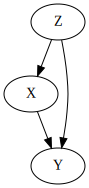

In [5]:
sprinkler = CausalGraphicalModel(nodes=["Z","Y","X"],
                                 edges=[("X","Y"),
                                        ("Z","X"),
                                        ("Z","Y")])
sprinkler.draw()

In [6]:
np.random.seed(24) # set seed

# Generate data
n = 1000 # sample size
Z = np.random.normal(0,1, 1000).reshape((1000, 1))
X = 5 * Z + np.random.normal(0, 1, 1000).reshape((1000, 1))
Y = 3 * X + 1.5 * Z + np.random.normal(0, 1, 1000).reshape((1000, 1))

# Create dataframe
D = np.hstack((Z, X, Y))
data = pd.DataFrame(D, columns = ["Z", "X", "Y"])

In [7]:
# Regressions
no_control = smf.ols("Y ~ X", data=data).fit()        # Wrong, not controlling by the confounder Z
using_control = smf.ols("Y ~ X + Z", data=data).fit() # Correct

# Summary results
dfoutput = summary_col([no_control, using_control], stars=True)
print(dfoutput)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

                  Y I       Y II  
----------------------------------
Intercept      -0.0121   -0.0283  
               (0.0322)  (0.0306) 
R-squared      0.9964    0.9967   
R-squared Adj. 0.9964    0.9967   
X              3.2928*** 2.9643***
               (0.0063)  (0.0315) 
Z                        1.6891***
                         (0.1590) 
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


**Model 2** 

We will assume that _X_ stands for the police salaries that affect the crime rate (_Y_). Then, we have another observable variable, as the policemen's supply (_Z_), that impacts _X_ but not _Y_. And, additionally, we know that there is an unobservable variable (denoted by a _•_), as the preference for maintaining civil order, that affects _Z_ and _Y_. The theory says that when controlling by _Z_, we block (some) of the unobservable variable’s back-door path from _X_ to _Y_. Thus, we see that in the second regression, the coefficient of _X_ is equal to the real one (0.5).

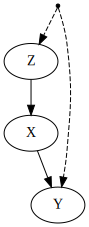

In [8]:
sprinkler = CausalGraphicalModel(nodes=["Z","Y","X"],
                                 edges=[("Z","X"),
                                        ("X","Y")],
                                 latent_edges=[("Z","Y")])
sprinkler.draw()

In [9]:
np.random.seed(24) # set seed

n = 1000
U = np.random.normal(0, 1, 1000).reshape((1000, 1))
Z = 7 * U + np.random.normal(0, 1, 1000).reshape((1000, 1))
X = 2 * Z + np.random.normal(0, 1, 1000).reshape((1000, 1))
Y = 0.5 * X + 0.2 * U + np.random.normal(0, 1, 1000).reshape((1000, 1))

# Create dataframe
D = np.hstack((U, Z, X, Y))
data = pd.DataFrame(D, columns = ["U", "Z", "X", "Y"])

In [10]:
# Regressions
no_control = smf.ols("Y ~ X", data=data).fit()
using_control = smf.ols("Y ~ X + Z", data=data).fit()

# Summary results
dfoutput = summary_col([no_control,using_control], stars=True)
print(dfoutput)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

                  Y I       Y II  
----------------------------------
Intercept      -0.0003   -0.0006  
               (0.0312)  (0.0312) 
R-squared      0.9820    0.9820   
R-squared Adj. 0.9820    0.9820   
X              0.5104*** 0.5000***
               (0.0022)  (0.0323) 
Z                        0.0209   
                         (0.0649) 
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


#### Bad Control (M-bias)

**Model 7** 

Let us suppose that _X_ stands for a job training program aimed at reducing unemployment. Then, there is a first unobserved confounder, which could be the planning effort and good design of the job program (right _•_) that impacts directly on the participation in job training programs (_X_) and the proximity of job programs (that would be the bad control _Z_). Furthermore, we have another unobserved confounder (left _•_), as the soft skills of the unemployed, that affects the employment status of individuals (_Y_) and the likelihood of beeing in a job training program that is closer (_Z_). That is why including _Z_ in the second regression makes _X_ coefficient value further to the real one.

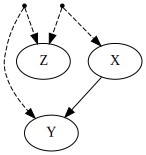

In [11]:
sprinkler = CausalGraphicalModel(nodes=["Z","Y","X"],
                                 edges=[("X","Y")],
                                 latent_edges=[("X","Z"),("Z","Y")]
                                )
sprinkler.draw()

In [12]:
np.random.seed(24) # set seed

n = 1000
U_1 = np.random.normal(0, 1, 1000).reshape((1000, 1))
U_2 = np.random.normal(0, 1, 1000).reshape((1000, 1))

Z = 0.3 * U_1 + 0.9 * U_2 + np.random.normal(0, 1, 1000).reshape((1000, 1)) # generate Z
X = 4 * U_1 + np.random.normal(0, 1, 1000).reshape((1000, 1))
Y = 3 * X + U_2 + np.random.normal(0, 1, 1000).reshape((1000, 1))

# Create dataframe
D = np.hstack((U_1, U_2, Z, X, Y))
data = pd.DataFrame(D, columns = ["U_1", "U_2", "Z", "X", "Y"])

In [13]:
# Regressions
no_control = smf.ols("Y ~ X", data=data).fit()
using_control = smf.ols("Y ~ X + Z", data=data).fit()

# Summary results
dfoutput = summary_col([no_control, using_control], stars=True)
print(dfoutput)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

                  Y I       Y II  
----------------------------------
Intercept      -0.0549   -0.0251  
               (0.0422)  (0.0384) 
R-squared      0.9884    0.9904   
R-squared Adj. 0.9884    0.9904   
X              2.9879*** 2.9596***
               (0.0102)  (0.0095) 
Z                        0.4349***
                         (0.0300) 
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


#### Neutral Control (possibly good for precision)

**Model 8** 

In this scenario, we will assume that _X_ represents the implementation of a new government policy to provide subsidies and guidance for small companies. There is another variable, _Z_, that stands for the % inflation rate. And both _X_ and _Z_ affect _Y_, which represents the GDP growth rate of the country. Then, even if _Z_ does not impact _X_, its inclusion improves the precision of the ATE estimator (8.5643 is closer to 8.6).

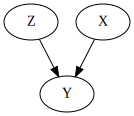

In [14]:
sprinkler = CausalGraphicalModel(nodes=["Z","Y","X"],
                                 edges=[("Z","Y"),("X","Y")])
sprinkler.draw()

In [15]:
np.random.seed(24) # set seed

n = 1000

Z = np.random.normal(0, 1, 1000).reshape((1000, 1))
X = np.random.normal(0, 1, 1000).reshape((1000, 1))
Y = 8.6 * X + 5 * Z + np.random.normal(0, 1, 1000).reshape((1000, 1))

# Create dataframe
D = np.hstack((Z, X, Y))
data = pd.DataFrame(D, columns = ["Z", "X", "Y"])

In [16]:
# Regressions
no_control = smf.ols("Y ~ X", data=data).fit()
using_control = smf.ols("Y ~ X + Z", data=data).fit()

# Summary results
dfoutput = summary_col([no_control, using_control], stars=True)
print(dfoutput)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

                  Y I       Y II  
----------------------------------
Intercept      0.0289    -0.0283  
               (0.1636)  (0.0306) 
R-squared      0.7109    0.9899   
R-squared Adj. 0.7107    0.9899   
X              8.3355*** 8.5643***
               (0.1682)  (0.0315) 
Z                        5.0108***
                         (0.0302) 
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


#### Bad Controls (Bias amplification)

**Model 10** 

Let us assume that _X_ measures the implementation of a housing program for young adults buying their first house, which impacts the average housing prices (_Y_). There is another observable variable, _Z_, that measures the expenditure of the program and affects only _X_. Also, there is an unobservable variable (represented by a •) that represents the preference of young adults to move from their parent's house and impacts only _X_ and _Y_. Therefore, the inclusion of _Z_ will "amplify the bias" of (•) on _X_, so the ATE estimator will be worse. We can see that in the second regression, the estimator (0.8241) is much farther from the real value (0.8).

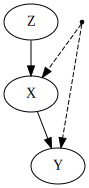

In [17]:
sprinkler = CausalGraphicalModel(nodes=["Z", "Y", "X"],
                                 edges=[("Z", "X"), ("X", "Y")],
                                 latent_edges=[("X", "Y")])
sprinkler.draw()

In [18]:
np.random.seed(24) # set seed

n = 1000
U = np.random.normal(0, 1, 1000).reshape((1000, 1))
Z = np.random.normal(0, 1, 1000).reshape((1000, 1))
X = 3 * Z + 6 * U + np.random.normal(0, 1, 1000).reshape((1000, 1))
Y = 0.8 * X + 0.2 * U + np.random.normal(0, 1, 1000).reshape((1000, 1))

# Create dataframe
D = np.hstack((U, Z, X, Y))
data = pd.DataFrame(D, columns = ["U", "Z", "X", "Y"])

In [19]:
# Regressions
no_control = smf.ols("Y ~ X" , data=data).fit()
using_control = smf.ols("Y ~ X + Z" , data=data).fit()

# Summary results
print(summary_col([no_control, using_control], stars=True))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

                  Y I       Y II  
----------------------------------
Intercept      0.0021    -0.0013  
               (0.0313)  (0.0312) 
R-squared      0.9686    0.9687   
R-squared Adj. 0.9685    0.9687   
X              0.8195*** 0.8241***
               (0.0047)  (0.0051) 
Z                        -0.0812**
                         (0.0349) 
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01
